In [60]:
from cropper.Cropper import Cropper
from detector.Detector import Detector
from reader.Reader import Reader
from reader.Config import Cfg
from PIL import Image

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
cfg_path = "./detector/config/detector_model.cfg"
weight_path = "./detector/config/yolo-tinyv4-obj_best.weights"
config = Cfg.load_config_from_file("./reader/tmp/cfg.yml")
config['weights'] = './reader/tmp/transformerocr2.pth'
config['device'] = 'cpu'

In [62]:
cropper = Cropper()
detector = Detector(cfg_path, weight_path)
reader = Reader(config)

# Cropper

Text(0.5, 1.0, 'Raw input')

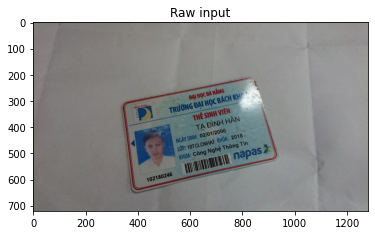

In [63]:
img_path = "./resized_img/han4.JPG"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Raw input")

Text(0.5, 1.0, 'Aligned Image')

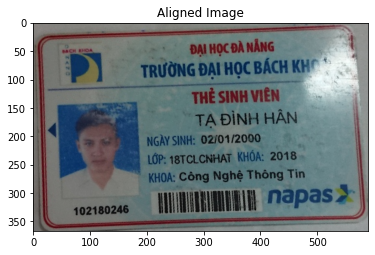

In [64]:
cropped_img = cropper.predict(img,img_path=None, resize=True)
# cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img)
plt.title("Aligned Image")

# Detector

Time = 1.7902026176452637


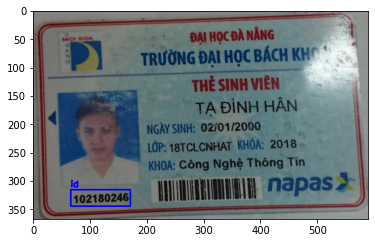

In [65]:
try:
    id_only_img, annotated_img = detector.predict(cropped_img)
    plt.imshow(annotated_img)
except:
    print("No object found!")

Text(0.5, 1.0, 'MSSV')

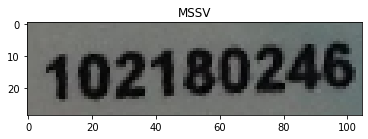

In [66]:
plt.imshow(id_only_img)
plt.title("MSSV")

# Reader

In [67]:
%%time
id_only_img = cv2.cvtColor(id_only_img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(id_only_img)
s = reader.predict(pil_img)
s

CPU times: user 384 ms, sys: 4.03 ms, total: 388 ms
Wall time: 229 ms


'102180246'